In [1]:
from bs4 import BeautifulSoup
import requests
import csv

In [2]:
url = "https://www.cars24.com/buy-used-datsun-cars-hyderabad/"

In [3]:
response = requests.get(url)

In [4]:
response.status_code

200

In [5]:
soup = BeautifulSoup(response.content, 'html.parser')

In [6]:
soup

<!DOCTYPE html>

<html lang="en-IN">
<head>
<link href="https://assets.cars24.com" rel="preconnect"/>
<link href="https://fastly-production.24c.in" rel="preconnect"/>
<link href="https://connect.facebook.net" rel="preconnect"/>
<link href="https://www.googletagmanager.com" rel="preconnect"/>
<link href="https://www.google-analytics.com" rel="preconnect"/>
<link href="https://analytics.twitter.com" rel="preconnect"/>
<link href="https://www.facebook.com" rel="preconnect"/>
<link href="https://www.google.com" rel="preconnect"/>
<link href="https://www.google.co.in" rel="preconnect"/>
<link href="https://googleads.g.doubleclick.net" rel="preconnect"/>
<link href="https://t.co" rel="preconnect"/>
<link href="https://static.ads-twitter.com" rel="preconnect"/>
<link href="https://tracking.cars24.com" rel="preconnect"/>
<link href="https://www.googleoptimize.com" rel="preconnect"/>
<link href="https://web-sdk.smartlook.com" rel="preconnect"/><meta charset="utf-8"/><meta content="width=device-

In [7]:
car_listings = soup.find_all('a', {'class':'IIJDn'})

In [8]:
len(car_listings)

15

In [9]:
with open('Cars24_Datsun_data.csv', 'w', newline='', encoding='UTF-8') as csvfile:
    fieldnames = ['Car Name', 'Kilometers Driven', 'Year of Manufacture', 'Fuel Type', 'Transmission', 'Price']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()

    for car in car_listings:
        car_name_full = car.find('h3', class_='_11dVb').text.strip()
        car_name_parts = car_name_full.split(' ')
        year_of_manufacture = car_name_parts[0]
        car_name = ' '.join(car_name_parts[1:])

        kilometers_driven = car.find('ul', class_='_3J2G-').find('li').text.strip()
        year_of_manufacture = car.find('h3', class_='_11dVb').text.strip().split()[0]
        li_elements = car.find('ul', class_='_3J2G-').find_all('li')
        fuel_type = li_elements[2].text.strip()
        transmission = li_elements[4].text.strip()

        price = car.find('strong', class_='_3RL-I').text.strip()

        writer.writerow({
            'Car Name': car_name,
            'Kilometers Driven': kilometers_driven,
            'Year of Manufacture': year_of_manufacture,
            'Fuel Type': fuel_type,
            'Transmission': transmission,
            'Price': price
        })

print("Data extraction completed and saved to Cars24_Datsun_data.csv")

Data extraction completed and saved to Cars24_Datsun_data.csv


Data Visualization

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("/content/Cars24_Datsun_data.csv")

In [11]:
data.head()

,Car Name,Kilometers Driven,Year of Manufacture,Fuel Type,Transmission,Price
0,Datsun Redi Go T(O) 1.0,"17,182 km",2020,Petrol,Manual,₹3.46 Lakh
1,Datsun Go T(O),"22,849 km",2019,Petrol,Manual,₹4.38 Lakh
2,Datsun Redi Go T(O),"42,479 km",2020,Petrol,Manual,₹4.31 Lakh
3,Datsun Redi Go S,"82,899 km",2016,Petrol,Manual,₹2.26 Lakh
4,Datsun Redi Go T(O) 1.0,"33,832 km",2021,Petrol,Manual,₹3.62 Lakh


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Car Name             15 non-null     object
 1   Kilometers Driven    15 non-null     object
 2   Year of Manufacture  15 non-null     int64 
 3   Fuel Type            15 non-null     object
 4   Transmission         15 non-null     object
 5   Price                15 non-null     object
dtypes: int64(1), object(5)
memory usage: 848.0+ bytes


In [13]:
data.shape

(15, 6)

In [14]:
data.dtypes

Car Name               object
Kilometers Driven      object
Year of Manufacture     int64
Fuel Type              object
Transmission           object
Price                  object
dtype: object

In [15]:
data.isna().sum()

Car Name               0
Kilometers Driven      0
Year of Manufacture    0
Fuel Type              0
Transmission           0
Price                  0
dtype: int64

In [16]:
data.nunique().sum()

48

In [17]:
data.duplicated().sum()

0

In [18]:
data['Kilometers Driven'] = data['Kilometers Driven'].str.replace(' km', '').str.replace(',', '').astype(int)
data['Price'] = data['Price'].str.replace('₹', '').str.replace(' Lakh', '').astype(float)
data['Price'] = data['Price'] * 100000
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_')

# Convert categorical values to numerical columns
data['fuel_type'] = data['fuel_type'].map({'Petrol': 1, 'Diesel': 2, 'Electric': 3})
data['transmission'] = data['transmission'].map({'Manual': 1, 'Automatic': 2})

In [19]:
data.describe()

,kilometers_driven,year_of_manufacture,fuel_type,transmission,price
count,15.000000,15.000000,15.0,15.000000,15.000000
mean,37694.333333,2018.400000,1.0,1.266667,356866.666667
std,19792.237005,1.681836,0.0,0.457738,87456.002544
min,12049.000000,2015.000000,1.0,1.000000,226000.000000
25%,24888.500000,2017.500000,1.0,1.000000,282000.000000
50%,33832.000000,2018.000000,1.0,1.000000,346000.000000
75%,44998.500000,2020.000000,1.0,1.500000,424000.000000
max,82899.000000,2021.000000,1.0,2.000000,532000.000000


In [20]:
data.head()

,car_name,kilometers_driven,year_of_manufacture,fuel_type,transmission,price
0,Datsun Redi Go T(O) 1.0,17182,2020,1,1,346000.0
1,Datsun Go T(O),22849,2019,1,1,438000.0
2,Datsun Redi Go T(O),42479,2020,1,1,431000.0
3,Datsun Redi Go S,82899,2016,1,1,226000.0
4,Datsun Redi Go T(O) 1.0,33832,2021,1,1,362000.0


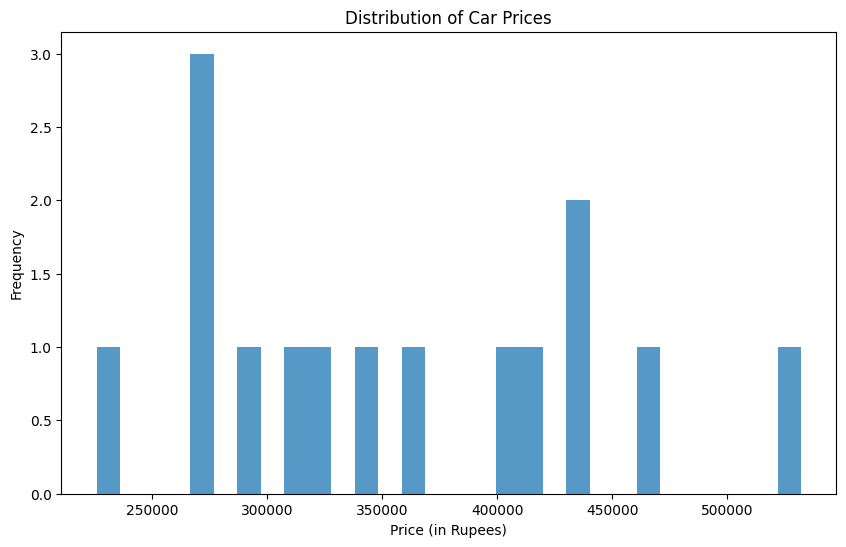

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], kde=False, bins=30, edgecolor=None)
plt.title('Distribution of Car Prices')
plt.xlabel('Price (in Rupees)')
plt.ylabel('Frequency')
plt.show()

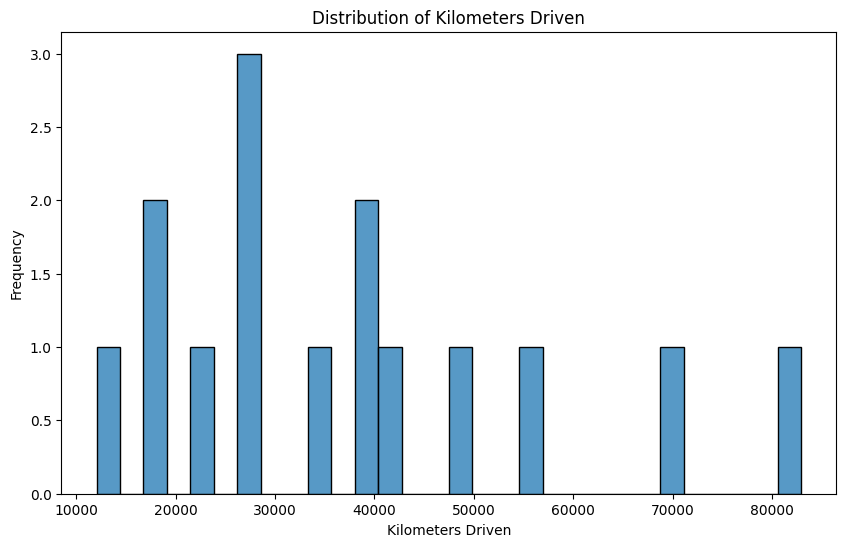

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(data['kilometers_driven'], kde=False, bins=30)
plt.title('Distribution of Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Frequency')
plt.show()

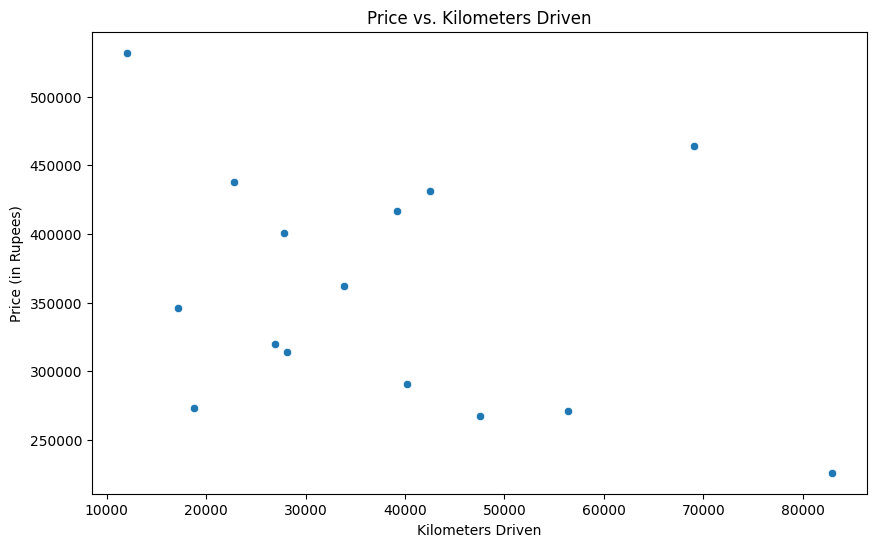

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='kilometers_driven', y='price', data=data)
plt.title('Price vs. Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Price (in Rupees)')
plt.show()

<ipython-input-24-724e23d8f9a2>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='fuel_type', y='price', data=data, estimator=np.mean, ci=None)


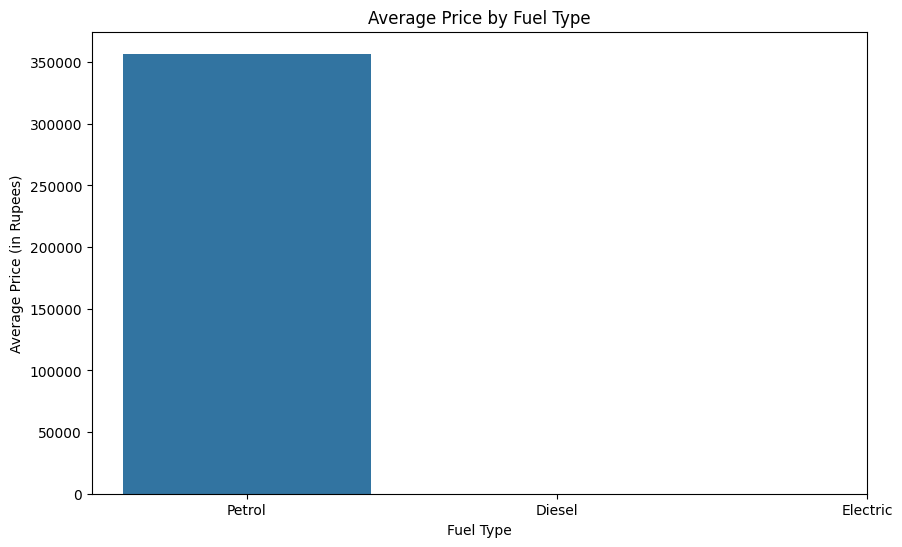

In [24]:
plt.figure(figsize=(10, 6))
sns.barplot(x='fuel_type', y='price', data=data, estimator=np.mean, ci=None)
plt.title('Average Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average Price (in Rupees)')
plt.xticks(ticks=[0, 1, 2], labels=['Petrol', 'Diesel', 'Electric'])
plt.show()

<ipython-input-25-9f0515a0bf79>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='transmission', y='price', data=data, estimator=np.mean, ci=None)


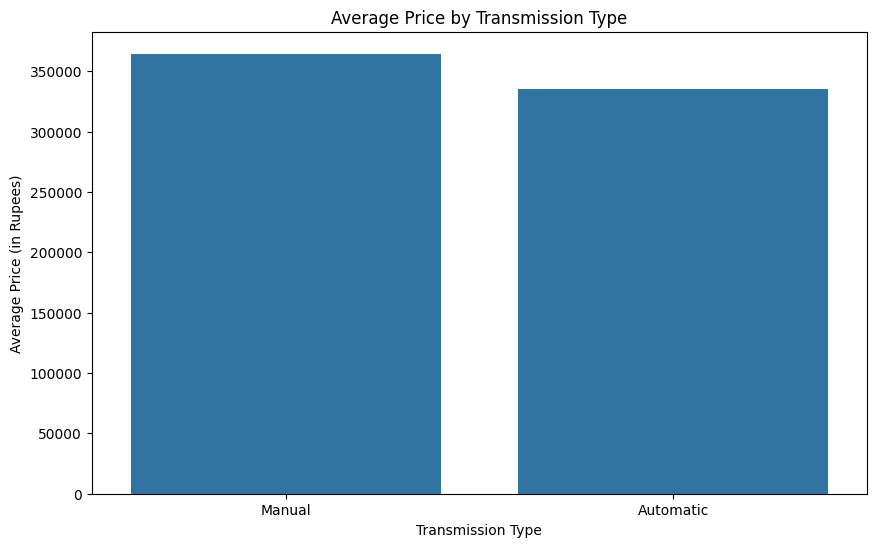

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(x='transmission', y='price', data=data, estimator=np.mean, ci=None)
plt.title('Average Price by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Average Price (in Rupees)')
plt.xticks(ticks=[0, 1], labels=['Manual', 'Automatic'])
plt.show()

Correlation Matrix:
                   kilometers_driven   price
kilometers_driven             1.0000 -0.3422
price                        -0.3422  1.0000


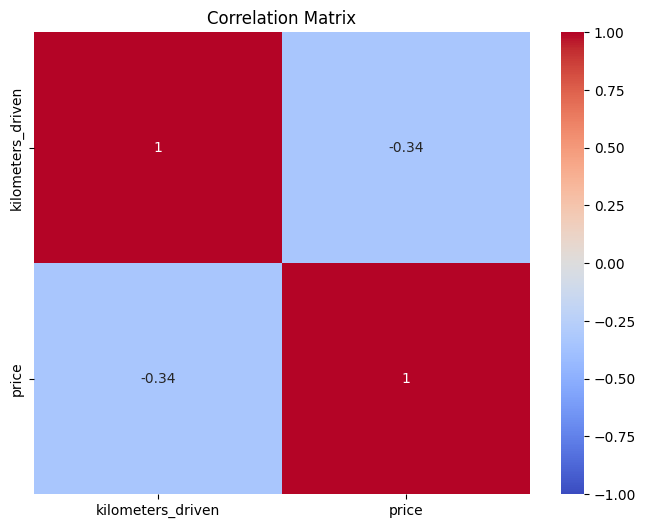

In [26]:
numeric_data = data[['kilometers_driven', 'price']]

correlation_matrix = numeric_data.corr()

print("Correlation Matrix:")
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

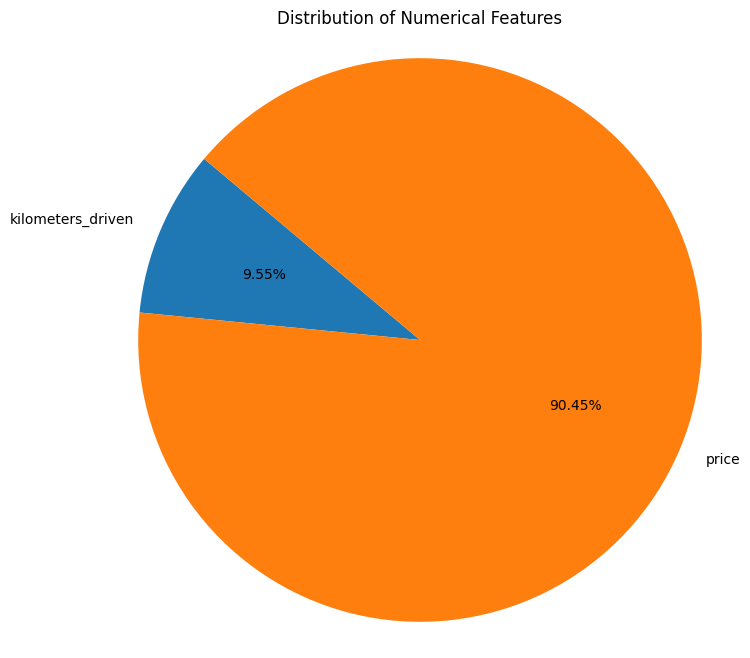

In [27]:
#Select numerical columns and sum their values for the pie chart
numerical_data = data[['kilometers_driven', 'price']].sum()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(numerical_data, labels=numerical_data.index, autopct='%.2f%%', startangle=140)
plt.title('Distribution of Numerical Features')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()